<a href="https://colab.research.google.com/github/SahoKondo/python_study_b2/blob/main/%E7%B7%9A%E5%BD%A2%E5%9B%9E%E5%B8%B0%E5%95%8F%E9%A1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 線形回帰問題を最小二乗法で解く

### 例題1-1

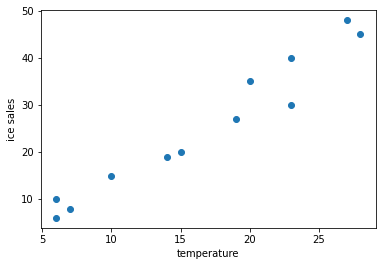

In [ ]:
#データを読み取り、グラフ化
import matplotlib.pyplot as plt
X = [6,6,10,15,20,23,27,28,23,19,14,7]
Y = [10,6,15,20,35,40,48,45,30,27,19,8]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(X,Y)
ax.set(xlabel="temperature",ylabel="ice sales")
plt.show()
fig.savefig("sales.png")

### 係数$a,b$を求める

In [ ]:
import sympy as sp
sp.init_printing()  # 数式の整形

In [ ]:
sp.var("a,b") # 変数の定義
L = 0
N = len(X)  #データの個数
for i in range(N):  # 目的関数の構成
    L += (a*X[i]+b-Y[i])**2

In [ ]:
L

## $\frac{\partial L}{\partial a}$の計算

In [ ]:
La = sp.diff(L,a)
La

## $\frac{\partial L}{\partial b}$の計算

In [ ]:
Lb = sp.diff(L,b)
Lb

## $a,b$を求める

In [ ]:
coef=sp.solve([La,Lb],[a,b])  # 連立一次方程式（変数はa,b）を解く
coef[a],coef[b]

## 最小の$L$の値

In [ ]:
float(L.subs([(a,coef[a]),(b,coef[b])]))  # sympyでは分数が表示されるのでfloat型にキャストした

## 予測モデルのグラフを描く

In [ ]:
import numpy as np
sp.var("x")
y1 = coef[a]*x+coef[b] # まずは線形モデルの定義
y1

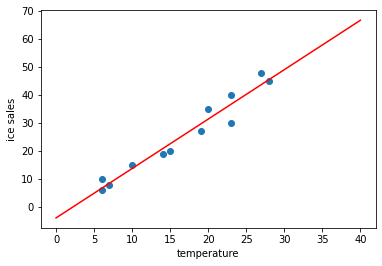

In [ ]:
# グラフにプロット
xx = np.linspace(0,40)
y = [y1.subs(x,x1) for x1 in xx]  # 予測モデルに具体的な値を代入している
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(X,Y)
ax.plot(xx,y,color="r")  # ここで関数yを使っている
ax.set(xlabel="temperature",ylabel="ice sales")
plt.show()
fig.savefig("sales.png")

In [ ]:
# 特定の気温値での予測
y1.subs(x,3.5)

## 機械学習ライブラリscikit-learnを使って例題1-1を解いてみる

In [ ]:
from sklearn.linear_model import LinearRegression
X = [6,6,10,15,20,23,27,28,23,19,14,7]  # 説明変数
# Xを機械学習用に変換する
X = [[X[i]] for i in range(len(X))]
Y = [10,6,15,20,35,40,48,45,30,27,19,8]  # 目的変数
X  # 外側のリストの中に内側のリストがある。内側のリストが特徴ベクトルの部分。今回の特徴ベクトルの次元は１。

In [ ]:
slr = LinearRegression()  # LinearRegressionモデルのインスタンス化
slr.fit(X,Y)  # 学習（パラメータを調整している）

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# 係数a
slr.coef_

array([1.76449788])

In [ ]:
# 係数b
slr.intercept_

In [ ]:
# 予測
slr.predict([[3.5]])

array([2.31152758])

## 確率・統計の教科書から。  
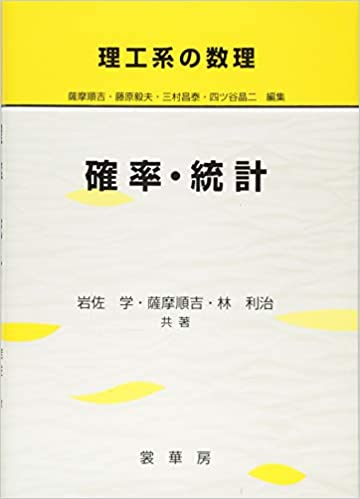

### 問題１－１.（確率・統計p.209問題３より）ある商品の価格xと一定期間に売れた個数yに関するデータは下記の通りである。このデータから回帰モデルを構成せよ。
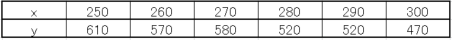

### 問題1１－１－１.例題1-1に従ってxとyに関するグラフを描け

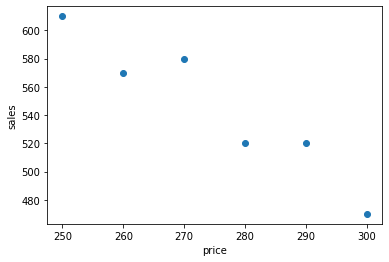

In [ ]:
X = [250,260,270,280,290,300]
Y = [610,570,580,520,520,470]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(X,Y)
ax.set(xlabel="price", ylabel="sales")
plt.show()
fig.savefig("sales.png")

### 問題１－１－２. SymPyを使って最小２乗問題を解き、回帰モデルの係数を求めよ。

1260 - 13*x/5


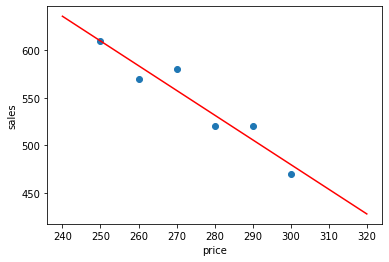

In [ ]:
sp.var("a,b")
L = 0
N = len(X)
for i in range(N):
    L += (a*X[i] + b - Y[i])**2
La = sp.diff(L,a)
Lb = sp.diff(L,b)
coef=sp.solve([La,Lb],[a,b])
float(L.subs([(a,coef[a]),(b,coef[b])]))
sp.var("x")
y1 = coef[a]*x+coef[b]
print(y1)
xx = np.linspace(240,320)
y = [y1.subs(x,x1) for x1 in xx]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(X,Y)
ax.plot(xx,y,color="r")
ax.set(xlabel="price", ylabel="sales")
plt.show()

### （おまけ）問題１－１－３. Scikit-learnを使って最小２乗問題を解き、回帰モデルの係数をもとめよ。

In [ ]:
from sklearn.linear_model import LinearRegression
X = [250,260,270,280,290,300]
X = [[X[i]] for i in range(len(X))]
Y = [610,570,580,520,520,470]
X
slr = LinearRegression()
slr.fit(X,Y)
slr.coef_, slr.intercept_, slr.predict([[245]])

(array([-2.6]), 1260.0, array([623.]))

### 問題１－２（時間があまったときにやる演習問題）  
次のデータはある店舗グループでの広告宣伝費とある月の来客数を調査したものです。  
$x=\mbox{広告宣伝費},~y=\mbox{来客数}$として$y=ax+b$のモデルがデータに最もフィットする場合の係数$a,b$を求めよ。  
さらに、広告宣伝費が８０万円のときの来客数を予測せよ。  
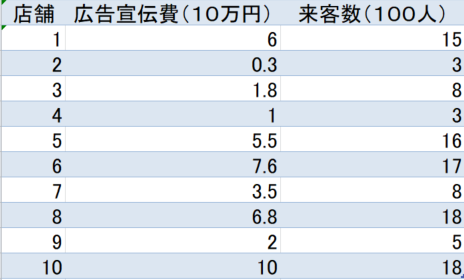

In [ ]:
X = [6,0.3,1.8,1,5.5,7.6,3.5,6.8,2,10]
X = [ [X[i]] for i in range(len(X)) ]
Y = [15,3,8,3,16,17,8,18,5,18]
X
slr = LinearRegression()
slr.fit(X,Y)
slr.coef_, slr.intercept_, slr.predict([[8]])*100

(array([1.85280965]), 2.8549970367975863, array([1767.7474274]))

## Appendix. 多項式回帰と交差検証法

例題A-1.例題１－１のデータを使って、２次式のモデルで多項式回帰問題を解け。

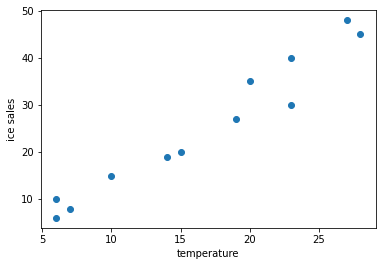

In [ ]:
# 例題１－１のデータを読み取り、グラフ化
import matplotlib.pyplot as plt
X = [6,6,10,15,20,23,27,28,23,19,14,7]
Y = [10,6,15,20,35,40,48,45,30,27,19,8]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(X,Y)
ax.set(xlabel="temperature",ylabel="ice sales")
plt.show()
fig.savefig("sales.png")

In [ ]:
import sympy as sp
sp.init_printing()  # 数式の整形
sp.var("a,b,c") # 変数の定義
L = 0
N = len(X)  #データの個数
for i in range(N):  # 目的関数の構成
    L += (a*X[i]**2+b*X[i]+c-Y[i])**2
L

In [ ]:
# dL/da,dL/db,dL/dcの計算
La = sp.diff(L,a)
Lb = sp.diff(L,b)
Lc = sp.diff(L,c)

# a,b,cを求める
coef = sp.solve([La,Lb,Lc])
coef

In [ ]:
# 最小のLの値: ちなみに線形モデルの場合はL≒117
float(L.subs([(a,coef[a]),(b,coef[b]),(c,coef[c])]))

In [ ]:
# 二次多項式予測モデルの構築
sp.var("x")
y = coef[a]*x**2+coef[b]*x+coef[c]

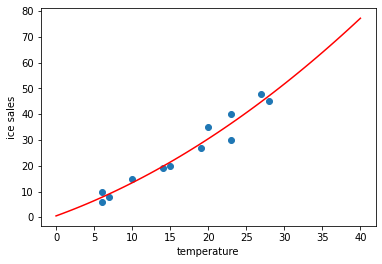

In [ ]:
# グラフを描く
import matplotlib.pyplot as plt

xx = np.linspace(0,40)
yy = [y.subs(x,x1) for x1 in xx]  # xxの各点に対する予測モデルの値をリストに入れる
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(X,Y)
ax.plot(xx,yy,color="r")  # xxとyyのグラフ
ax.set(xlabel="temperature",ylabel="ice sales")
plt.show()
fig.savefig("sales.png")

### 交差検証法
scikit-learnを使います。  
一見、複雑な処理をしているように見えますがまったく定型的な処理です。一度テンプレートを作ってしまえば、次回からこのテンプレートを参照しながら改造すればOK.

データの準備

In [ ]:
X = [6,6,10,15,20,23,27,28,23,19,14,7]  # 説明変数
# Xを機械学習用に変換する
X = [[X[i]] for i in range(len(X))]
Y = [10,6,15,20,35,40,48,45,30,27,19,8]  # 目的変数
X  # 外側のリストの中に内側のリストがある。内側のリストが特徴ベクトルの部分。今回の特徴ベクトルの次元は１。

まずは線形モデルから

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

slr = LinearRegression()  # 予測モデル：LinearRegressionモデルのインスタンス化
# 交差検証の実施
scores = cross_validate(slr,X,Y,cv=2,scoring="neg_mean_squared_error")  # cv=2がデータを２つにわけること

In [ ]:
# 結果の中身をチェック
scores

{'fit_time': array([0.00118637, 0.0009613 ]),
 'score_time': array([0.00066519, 0.00084591]),
 'test_score': array([-14.60819773, -21.72529149])}

In [ ]:
# 線形モデルの性能（MSEなので小さいほどよい）
-scores["test_score"].mean()  # 各訓練サブデータによる学習結果を検証用サブデータに適用したときのMSE値の平均をとっている

２次多項式モデル

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
spr = LinearRegression()  # 予測モデル：２次多項式モデルもやっていることは線形モデルと同じ

# 元の特徴ベクトルのそれぞれに二乗の項を追加する
quadratic = PolynomialFeatures(degree=2)
X2 = quadratic.fit_transform(X)
X2

array([[  1.,   6.,  36.],
       [  1.,   6.,  36.],
       [  1.,  10., 100.],
       [  1.,  15., 225.],
       [  1.,  20., 400.],
       [  1.,  23., 529.],
       [  1.,  27., 729.],
       [  1.,  28., 784.],
       [  1.,  23., 529.],
       [  1.,  19., 361.],
       [  1.,  14., 196.],
       [  1.,   7.,  49.]])

In [ ]:
# 交差検証の実施
scores2 = cross_validate(spr,X2,Y,cv=2,scoring="neg_mean_squared_error")   # 特徴ベクトルの項がXではなくてX2になっているところに注目

In [ ]:
# ２次多項式モデルの性能（MSEなので小さいほどよい）
-scores2["test_score"].mean()

問題A-1.問題１－１では線形回帰モデルを使った場合と２次の多項式回帰モデルを使った場合はどちらが性能が上になりそうか。交差検証法を使って示せ。